In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys, time, random
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=True)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick', direction="in")
matplotlib.rc('ytick', direction="in")
matplotlib.rc('xtick', top = True)
matplotlib.rc('ytick', right =True )
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device('cuda:0')

In [417]:
from ptrac import *
rawdatafolder = r"/home/jiyongso/jhjeon/multi4/multi4/ptrac_CGMF"
pkldatafolder = r"./data"
jjhdatafolder = r"/home/jiyongso/jhjeon/intermediate"

In [341]:
#ptrac_analysis_all_save(rawdatafolder, 3)


In [183]:
sjyanalysis = read_ptrac_analysis("./data/C3_analysis.pkl")
jjhanalysis = read_jjh(rawdatafolder, 3, None, 0)
#jjhnl, jjhpl = list((jjhanalysis0[0]).values()), list((jjhanalysis0[1]).values())
kks = sjyanalysis.keys()
sjynl = [sjyanalysis[kk] for kk in kks if kk.split("_")[2]=="neutron"]
sjypl = [sjyanalysis[kk] for kk in kks if kk.split("_")[2]=="photon"]

kks = jjhanalysis.keys()
jjhnl = [jjhanalysis[kk] for kk in kks if kk.split("_")[2]=="neutron"]
jjhpl = [jjhanalysis[kk] for kk in kks if kk.split("_")[2]=="photon"]

jjhn, jjhp = pd.concat(jjhnl), pd.concat(jjhpl)
sjyn, sjyp = pd.concat(sjynl), pd.concat(sjypl)

In [347]:
for k, v in sjyanalysis.items():
    print(k, v.time.min(), v.time.max())

C3_1_neutron 241.61 99986.0
C3_1_photon 73.283 99963.0
C3_2_neutron 254.09 99969.0
C3_2_photon 147.68 99970.0
C3_3_neutron 48.863 99941.0
C3_3_photon 30.766 99957.0
C3_4_neutron 16.668 99593.0
C3_4_photon 15.896 99993.0
C3_5_neutron 475.12 99928.0
C3_5_photon 11.543 99969.0
C3_6_neutron 54.818 99963.0
C3_6_photon 17.129 99917.0
C3_7_neutron 117.27 99906.0
C3_7_photon 114.56 99993.0
C3_8_neutron 144.0 99802.0
C3_8_photon 14.967 99801.0
C3_9_neutron 49.022 99921.0
C3_9_photon 47.85 99920.0
C3_10_neutron 11.824 99926.0
C3_10_photon 2.0718 99929.0
C3_11_neutron 18.431 99958.0
C3_11_photon 17.724 99980.0
C3_12_neutron 25.748 99954.0
C3_12_photon 25.064 99954.0
C3_13_neutron 3.2563 99827.0
C3_13_photon 2.6636 99975.0
C3_14_neutron 84.791 99940.0
C3_14_photon 82.696 99964.0
C3_15_neutron 215.37 99769.0
C3_15_photon 49.508 99807.0
C3_16_neutron 6.4798 99953.0
C3_16_photon 0.099205 99954.0
C3_17_neutron 37.088 99906.0
C3_17_photon 36.694 99904.0
C3_18_neutron 17.47 99898.0
C3_18_photon 16.963 9

In [350]:
# jjhk = list(jjhanalysis0[1].keys())
# for k, v in sjyanalysis.items():
#     if k.endswith("photon"):
#         #print(k)
#         print(k, sjyanalysis[k].shape[0]-jjhanalysis0[1][k+"_analysis"].shape[0])

sjyreduce = ptrac_reduce(sjyanalysis, False)
jjhreduce = read_jjh(rawdatafolder, 3, None, 1)

In [195]:
sjycombine = ptrac_combine(sjyreduce)

{128, 129, 141, 142, 143, 321, 322, 323, 324, 325, 326, 327, 328, 329, 341, 342, 343, 221, 222, 223, 224, 225, 226, 227, 228, 229, 241, 242, 243, 121, 122, 123, 124, 125, 126, 127}
{128, 1, 129, 521, 141, 142, 143, 321, 322, 323, 324, 325, 326, 327, 328, 329, 341, 342, 343, 221, 222, 223, 224, 225, 226, 227, 228, 229, 241, 242, 243, 121, 122, 123, 124, 125, 126, 127}
set()
{1, 521}


In [351]:
for k, v in jjhreduce.items():
    print(k, v.time.min(), v.time.max())

C3_1_neutron_reduced 241.61 99986.0
C3_1_photon_reduced 74.055 99963.0
C3_2_neutron_reduced 254.09 99969.0
C3_2_photon_reduced 147.91 99968.0
C3_3_neutron_reduced 48.863 99941.0
C3_3_photon_reduced 31.888 99957.0
C3_4_neutron_reduced 16.668 99593.0
C3_4_photon_reduced 16.187 99993.0
C3_5_neutron_reduced 475.12 99928.0
C3_5_photon_reduced 11.592 99968.0
C3_6_neutron_reduced 54.818 99841.0
C3_6_photon_reduced 17.133 99917.0
C3_7_neutron_reduced 117.27 99906.0
C3_7_photon_reduced 116.27 99992.0
C3_8_neutron_reduced 144.0 99802.0
C3_8_photon_reduced 15.087 99801.0
C3_9_neutron_reduced 49.022 99921.0
C3_9_photon_reduced 47.969 99920.0
C3_10_neutron_reduced 11.824 99926.0
C3_10_photon_reduced 92.681 99929.0
C3_11_neutron_reduced 18.431 99890.0
C3_11_photon_reduced 17.848 99980.0
C3_12_neutron_reduced 25.748 99954.0
C3_12_photon_reduced 25.412 99954.0
C3_13_neutron_reduced 3.2563 99827.0
C3_13_photon_reduced 4.5586 99975.0
C3_14_neutron_reduced 84.791 99940.0
C3_14_photon_reduced 84.714 99964

In [198]:
print(sjyreduce["C3_2_photon"][0:10])

      time  cell  Nhist origin
0  99400.0     1      2      E
1  99400.0   324      2      O
2  87542.0     1      3      E
3  29840.0     1      4      E
4  91117.0     1      5      E
5  12973.0     1      6      E
6  35184.0     1      7      E
7  60746.0     1      8      E
8  43387.0     1      9      E
9  13916.0     1     10      E


In [197]:
print(jjhreduce["C3_2_photon_reduced"][0:10])

      time  cell  Nhist         origin
0  99400.0     1      2  photoelectric
1  99400.0   324      2        compton
2  99400.0     1      2  photoelectric
3  87542.0     1      3  photoelectric
4  29840.0     1      4  photoelectric
5  91117.0     1      5  photoelectric
6  12973.0     1      6  photoelectric
7  35184.0     1      7  photoelectric
8  60746.0     1      8  photoelectric
9  43387.0     1      9  photoelectric


In [168]:
sjyanalysis["C3_2_neutron"][9:20]

,time,cell,Nhist,origin
9,48848.0,121,11,C
10,48848.0,121,11,P
11,45178.0,226,12,C
12,56555.0,129,14,C
13,56555.0,342,14,C
14,86842.0,123,17,C
15,68971.0,126,18,P
16,21152.0,229,19,C
17,86553.0,221,21,C
18,5012.3,229,22,C


In [204]:
sjycombine_n, sjycombine_p= ptrac_combine(sjyreduce)

(21892, 4)


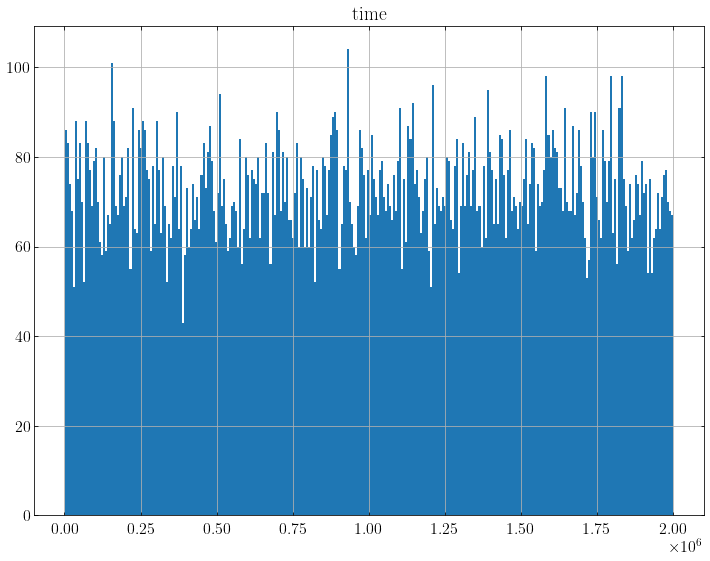

In [231]:
sjycombine_n.hist("time", bins=300)
print(sjycombine_n.shape)

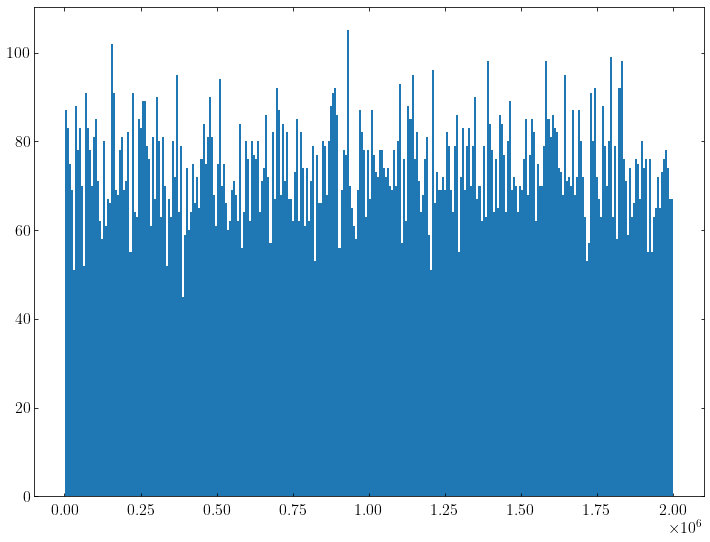

In [260]:
jjhcombine = np.loadtxt(os.path.join(rawdatafolder, "C3_neutron.o"))
histx, histy, _ =plt.hist(jjhcombine, bins=300)

In [353]:
jjhcombine_my_n, jjhcombine_my_p = ptrac_combine(jjhreduce)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
{128, 129, 141, 142, 143, 321, 322, 323, 324, 325, 326, 327, 328, 329, 341, 342, 343, 221, 222, 223, 224, 225, 226, 227, 228, 229, 241, 242, 243, 121, 122, 123, 124, 125, 126, 127}
{128, 1, 129, 521, 141, 142, 143, 321, 322, 323, 324, 325, 326, 327, 328, 329, 341, 342, 343, 221, 222, 223, 224, 225, 226, 227, 228, 229, 241, 242, 243, 121, 122, 123, 124, 125, 126, 127}
set()
{1, 521}


In [368]:
(jjhcombine_my_n.time - jjhcombine).max()

0.9990000000107102

In [352]:
for k, v in jjhreduce.items():
    print(k, v.time.min(),v.time.max())

C3_1_neutron_reduced 241.61 99986.0
C3_1_photon_reduced 74.055 99963.0
C3_2_neutron_reduced 254.09 99969.0
C3_2_photon_reduced 147.91 99968.0
C3_3_neutron_reduced 48.863 99941.0
C3_3_photon_reduced 31.888 99957.0
C3_4_neutron_reduced 16.668 99593.0
C3_4_photon_reduced 16.187 99993.0
C3_5_neutron_reduced 475.12 99928.0
C3_5_photon_reduced 11.592 99968.0
C3_6_neutron_reduced 54.818 99841.0
C3_6_photon_reduced 17.133 99917.0
C3_7_neutron_reduced 117.27 99906.0
C3_7_photon_reduced 116.27 99992.0
C3_8_neutron_reduced 144.0 99802.0
C3_8_photon_reduced 15.087 99801.0
C3_9_neutron_reduced 49.022 99921.0
C3_9_photon_reduced 47.969 99920.0
C3_10_neutron_reduced 11.824 99926.0
C3_10_photon_reduced 92.681 99929.0
C3_11_neutron_reduced 18.431 99890.0
C3_11_photon_reduced 17.848 99980.0
C3_12_neutron_reduced 25.748 99954.0
C3_12_photon_reduced 25.412 99954.0
C3_13_neutron_reduced 3.2563 99827.0
C3_13_photon_reduced 4.5586 99975.0
C3_14_neutron_reduced 84.791 99940.0
C3_14_photon_reduced 84.714 99964

In [369]:
jjhrossi=np.loadtxt(os.path.join(rawdatafolder, "C3_neutron_rossi.o"))
print(jjhrossi)
a=plt.hist(jjhrossi, bins=100)
#plt.yscale('log')
jjhrossi_my_n = jjh_rossi(jjhcombine_my_n)

In [374]:
print(jjhrossi.shape, jjhrossi_my_n.shape)

(54014,) (54013,)


In [419]:
ss=ptrac_rossi0(jjhcombine_my_n)

(22216,)


Text(0, 0.5, 'count (C3)')

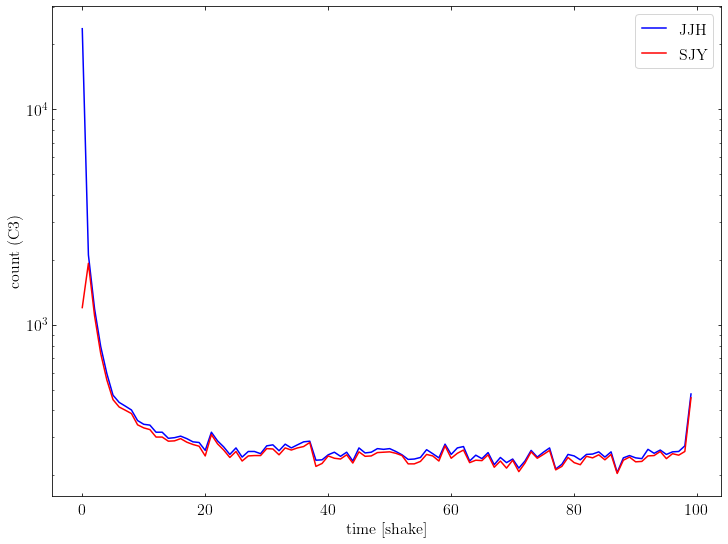

In [431]:
rossihist1=np.histogram(jjhrossi.astype(np.int64), bins=100)
rossihist2=np.histogram(jjhrossi_my_n, bins=100)
plt.plot(rossihist1[0], 'b-', label='JJH')
#plt.plot(rossihist2[0])
#plt.plot(np.histogram(ss.astype(np.int64), bins=100)[0])
plt.plot(np.histogram(sjyrossi_n, bins=100)[0], 'r-', label='SJY')
plt.yscale('log')
plt.legend()
plt.xlabel("time [shake]")
plt.ylabel("count (C3)")
#plt.ylim(0, 500)

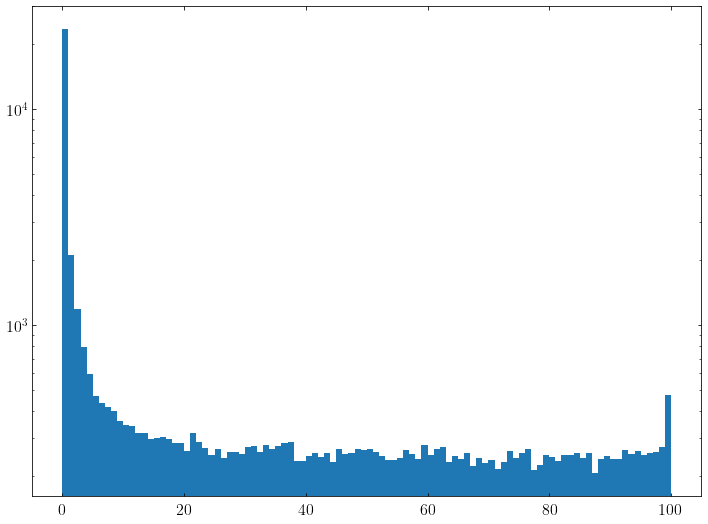

In [424]:
plt.hist(jjhrossi, bins=100)
plt.yscale('log')

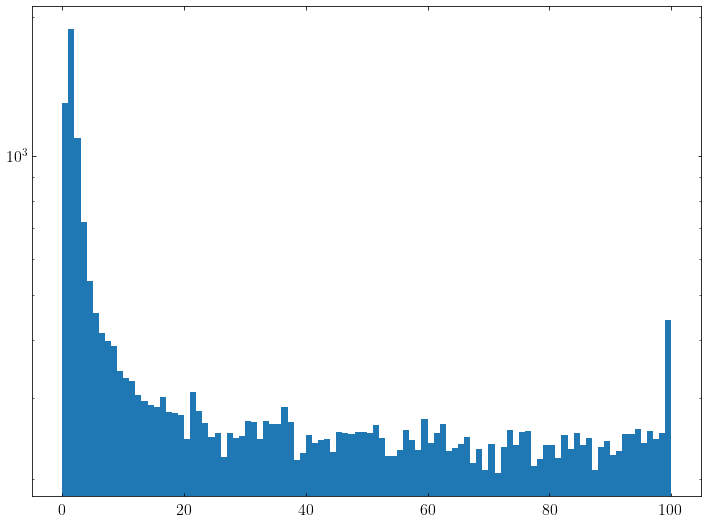

In [214]:
plt.hist(sjyrossi_n, bins=100)
plt.yscale('log')

In [385]:
jjhcombine_my_n

,time,cell,Nhist,origin
0,241.61,325,1183,proton production
1,243.56,225,661,proton production
2,501.66,142,218,proton production
3,502.05,223,218,carbon scattering
4,597.03,229,635,carbon scattering
...,...,...,...,...
22211,1998994.00,343,799,carbon scattering
22212,1998999.00,324,477,carbon scattering
22213,1999122.00,323,1021,carbon scattering
22214,1999794.00,143,524,carbon scattering


In [401]:
sjyrossi_n=ptrac_rossi(sjycombine_n)

[    241     243     501 ... 1999122 1999794 1999855]


In [407]:
st=ss[ss==0]

In [410]:
st.shape

(1452,)

In [412]:
ll=ptrac_rossi0(sjycombine_n)

[    241     243     501 ... 1999122 1999794 1999855]


In [414]:
qt = sjycombine_n.time


In [415]:
qt

0            241.61
1            243.56
2            501.66
3            502.05
4            597.03
            ...    
21887    1998994.00
21888    1998999.00
21889    1999122.00
21890    1999794.00
21891    1999855.00
Name: time, Length: 21892, dtype: float64

In [433]:
sjyrossi_n=ptrac_rossi(sjycombine_n, 100)

[    241     243     501 ... 1999122 1999794 1999855]


[2.416100e+02 2.435600e+02 5.016600e+02 ... 1.999122e+06 1.999794e+06
 1.999855e+06]


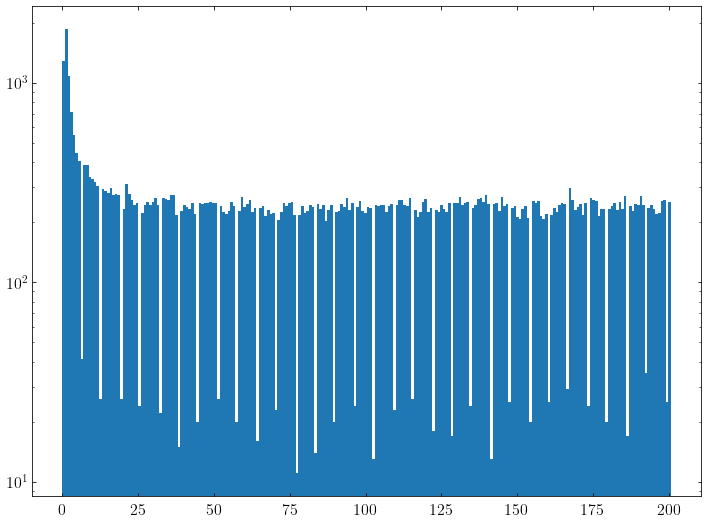

In [471]:
plt.hist(ptrac_rossi(sjycombine_n, 1100), bins=np.arange(0., 201., np.e/np.pi))
plt.yscale('log')

In [447]:
sjycombine_n.max()

time      1999855.0
cell            343
Nhist          1531
origin            P
dtype: object

In [450]:
ddd = np.random.random(100000)*1000

(array([ 969.,  967.,  973.,  974.,  976.,  989.,  942., 1044., 1019.,
        1010., 1021.,  911.,  987., 1036.,  969.,  970.,  968.,  993.,
        1024., 1016.,  996., 1022., 1023., 1009.,  953., 1056., 1033.,
         967., 1010., 1013., 1032.,  989., 1034., 1027.,  966., 1011.,
        1047., 1034., 1028.,  985., 1008., 1016.,  952.,  998.,  978.,
         989.,  999.,  988.,  983.,  992.,  996.,  955.,  965.,  968.,
        1042., 1058., 1026., 1007., 1012., 1015., 1051.,  971., 1024.,
         979.,  972.,  977.,  993.,  999., 1047., 1004., 1040.,  954.,
         982.,  968., 1029., 1024.,  995.,  962., 1019.,  989.,  972.,
        1000., 1027., 1003.,  991., 1069., 1007., 1030., 1021.,  991.,
         974.,  938., 1028.,  957.,  992., 1035., 1003.,  961., 1058.,
        1024.]),
 array([1.38729698e-02, 1.00135496e+01, 2.00132262e+01, 3.00129028e+01,
        4.00125794e+01, 5.00122560e+01, 6.00119326e+01, 7.00116092e+01,
        8.00112858e+01, 9.00109624e+01, 1.00010639e+02, 1.

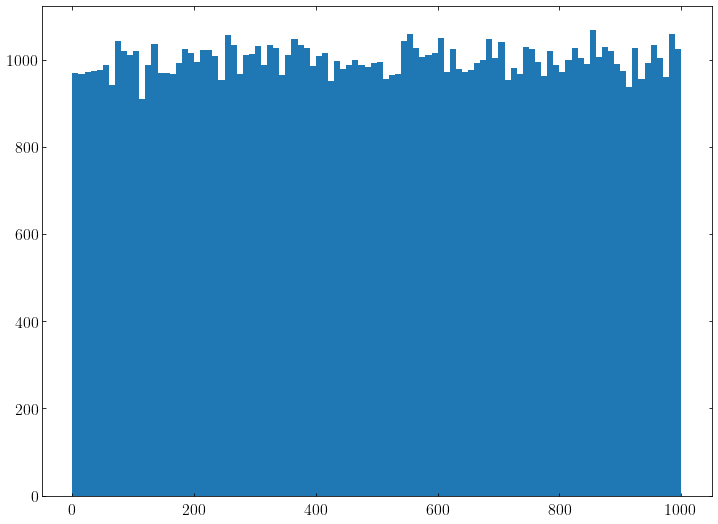

In [451]:
plt.hist(ddd, bins=100)